# TP outil d’estimation de véhicules d’occasions

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## Libraries import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from datetime import datetime
import seaborn as sns
#from sklearn.model_selection import train_test_split

## Dataframe import

In [3]:
victorPath = 'Data_cars.csv'
myriamPath = 'D:\Data_cars.csv'
fpath = os.path.join(myriamPath)
print(fpath)
df = pd.read_csv(fpath)
df

D:\Data_cars.csv


,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."
...,...,...,...,...,...,...,...,...,...
166690,20990.0,AUDI,A4,2014,65885.0 km,Diesel,automatique,06/07/2018 à 5h44,"modele: A4 (4E GENERATION) AVANT, version: IV ..."
166691,12056.0,VOLKSWAGEN,GOLF,2015,186000.0 km,Diesel,automatique,01/06/2018 à 15h22,"modele: GOLF 7, version: VII 2.0 TDI 150 BLUEM..."
166692,13423.0,FORD,FIESTA,2016,8784.0 km,Essence,mécanique,26/07/2018 à 18h57,"modele: FIESTA 5, version: V (2) 1.0 ECOBOOST ..."
166693,11918.0,SKODA,OCTAVIA,2013,111339.0 km,Diesel,automatique,30/05/2018 à 17h55,"modele: OCTAVIA 3, version: III 2.0 TDI 150 GR..."


## Dataframe exploration

In [4]:
df.shape

(166695, 9)

In [5]:
df.columns.tolist()

['Price',
 'Make',
 'Model',
 'Model_year',
 'Mileage',
 'Fuel',
 'Gearbox',
 'Online',
 'Description']

In [6]:
df.head(10)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."
5,27956.0,BMW,X3,2012,95623.0 km,Diesel,automatique,14/03/2018 à 4h24,"modele: X3 F25, version: (F25) XDRIVE35D 313 S..."
6,16888.0,AUDI,A3,2013,49018.0 km,Diesel,mécanique,16/04/2018 à 21h35,"modele: A3 (2E GENERATION) SPORTBACK, version:..."
7,18188.0,RENAULT,MEGANE,2017,9795.0 km,Diesel,automatique,29/04/2018 à 12h44,"modele: MEGANE 4 ESTATE, version: IV ESTATE 1...."
8,10594.0,FORD,C-MAX,2012,126670.0 km,Diesel,mécanique,22/06/2018 à 5h11,"modele: C-MAX 2, version: II 1.6 TDCI 115 FAP ..."
9,69131.0,MERCEDES,CLASSE C,2015,39439.0 km,Essence,automatique,08/03/2018 à 17h35,"modele: CLASSE C 4 AMG, version: (W205) 63 AMG..."


In [7]:
print (df.dtypes)

Price          float64
Make            object
Model           object
Model_year       int64
Mileage         object
Fuel            object
Gearbox         object
Online          object
Description     object
dtype: object


In [8]:
df['Mileage'] = df['Mileage'].map(lambda x : int(float(x[:-3])))
print (df.dtypes)

Price          float64
Make            object
Model           object
Model_year       int64
Mileage          int64
Fuel            object
Gearbox         object
Online          object
Description     object
dtype: object


In [9]:
df.at[2,'Description']

"modele: RS6 (3E GENERATION) AVANT, version: III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC, puissance_fiscale: 47, portes: 5.0, options: banquette arrière 3 places;écran tactile;témoin de bouclage des ceintures av;palettes au volant;volant cuir;régulateur limiteur de vitesse;commande climatisation ar;pack dynamique;cache bagages;sorties d'échappement chromées;affichage tête haute;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;vision périphérique (360°);commandes vocales;vitres teintées;GPS;services connectés;prise audio USB;stations de webradio;poignées ton carrosserie;pare-brise thermique;système d'éclairage intelligent;régulateur de vitesse;siège conducteur à mémoire;inserts de porte carbone;rétroviseurs extérieurs à mémoire;carte main libre;jantes alu;siège passager à réglages électriques;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;colonne de direction électr. à mémoire;applications bois noir avec inserts alu;accoudoir central arrière;climatisa

In [10]:
df.describe()

,Price,Model_year,Mileage
count,1.666950e+05,166695.000000,1.666950e+05
mean,1.933369e+04,2014.605387,4.689404e+04
std,1.642034e+04,8.304980,4.821007e+04
min,1.000000e+00,1900.000000,1.000000e+00
25%,1.128000e+04,2013.000000,9.169500e+03
50%,1.577400e+04,2016.000000,3.048500e+04
75%,2.270750e+04,2017.000000,7.335700e+04
max,1.486500e+06,5018.000000,1.418551e+06


In [11]:
df.isna().sum()

Price          0
Make           0
Model          0
Model_year     0
Mileage        0
Fuel           0
Gearbox        0
Online         0
Description    0
dtype: int64

Text(0.5, 1.0, 'Pice in terms of Mileage')

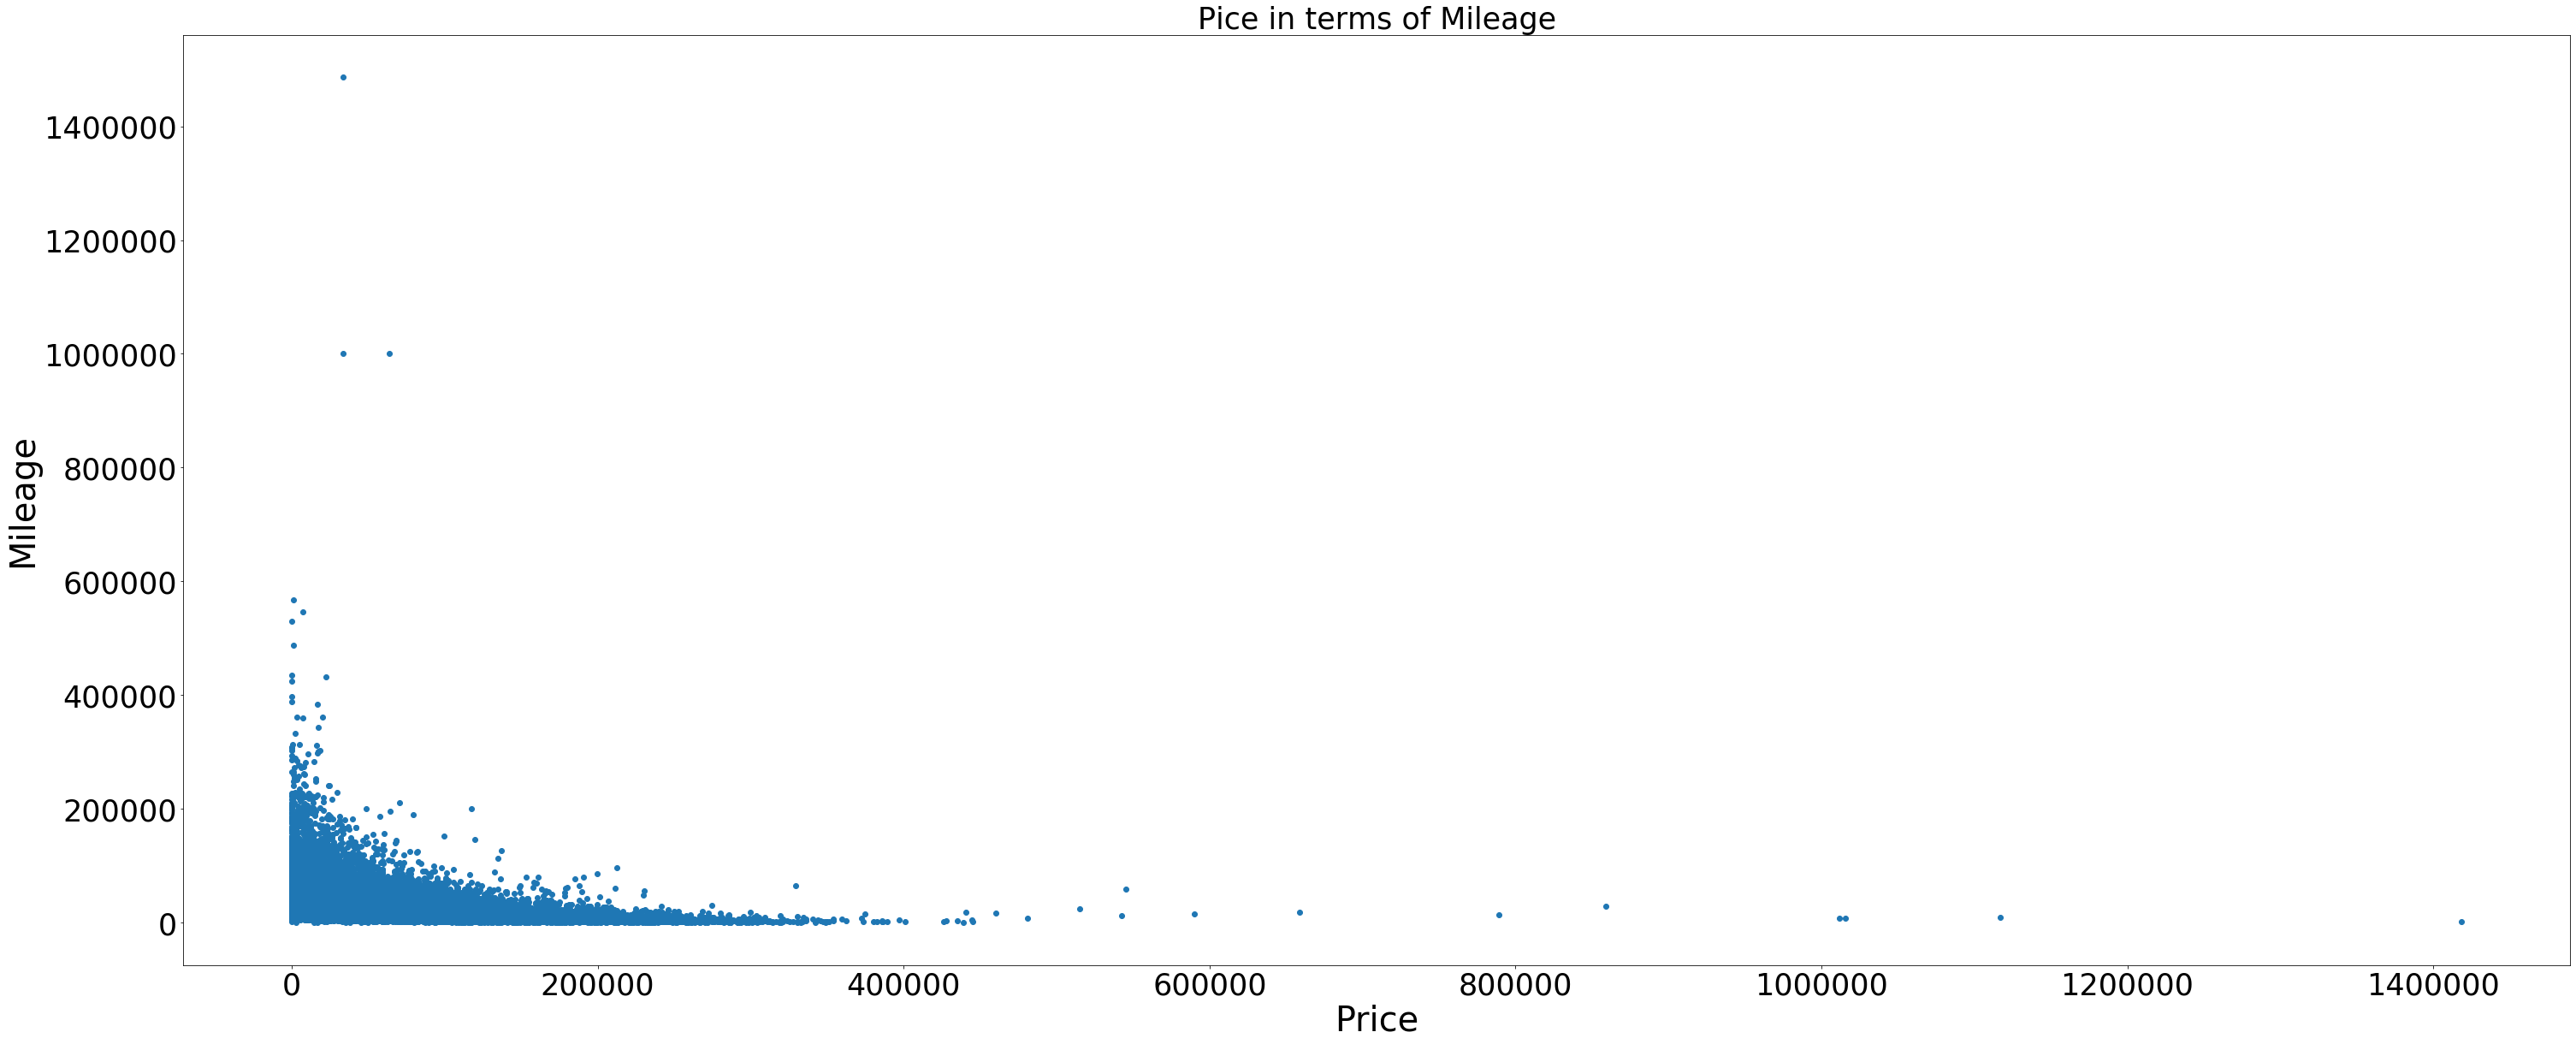

In [12]:
plt.figure(figsize=(50,20))
plt.scatter(df['Mileage'],df['Price'])
plt.xlabel("Price",size=40)
plt.xticks(size=35)
plt.ylabel("Mileage",size=40)
plt.yticks(size=35)
plt.title('Pice in terms of Mileage',size=35)

Text(0, 0.5, 'Number of cars')

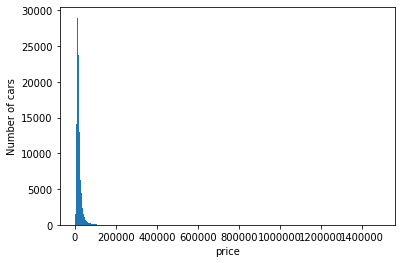

In [13]:
plt.hist(df['Price'],bins=500)
plt.xlabel("price",size=10)
plt.ylabel("Number of cars",size=10)

Text(0, 0.5, 'Number of cars')

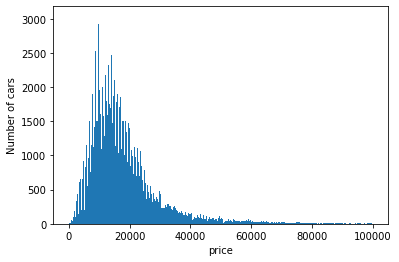

In [14]:
df2 = df.loc[df['Price'] < 100000]
plt.hist(df2['Price'],bins=500)
plt.xlabel("price",size=10)
plt.ylabel("Number of cars",size=10)

In [15]:
df['Make']=df['Make'].map(lambda x: x.strip())
df.Make.unique()

array(['PEUGEOT', 'BMW', 'AUDI', 'FORD', 'FIAT', 'RENAULT', 'MERCEDES',
       'SEAT', 'MINI', 'HYUNDAI', 'DACIA', 'VOLKSWAGEN', 'CITROEN',
       'TOYOTA', 'JAGUAR', 'OPEL', 'PORSCHE', 'NISSAN', 'LAND ROVER',
       'MAZDA', 'VOLVO', 'SKODA', 'DS', 'SSANGYONG', 'SUZUKI', 'HONDA',
       'LEXUS', 'INFINITI', 'JEEP', 'KIA', 'DODGE', 'ASTON MARTIN',
       'LANCIA', 'LOTUS', 'CHEVROLET', 'SMART', 'ALFA ROMEO', 'BUGATTI',
       'MITSUBISHI', 'MERCEDES-AMG', 'AIXAM', 'FERRARI', 'MG',
       'LAMBORGHINI', 'MASERATI', 'SUBARU', 'MORGAN', 'CHRYSLER',
       'ROLLS ROYCE', 'TESLA', 'ABARTH', 'LADA', 'BMW-ALPINA', 'SAAB',
       'PACKARD', 'CADILLAC', 'ROVER', 'SHELBY', 'MICROCAR', 'ALPINA',
       'BENTLEY', 'DAIHATSU', 'HUMMER', 'TRIUMPH', 'LIGIER', 'DAEWOO',
       'AUSTIN HEALEY', 'JIAYUAN', 'MCLAREN', 'AUSTIN', 'DANGEL',
       'CATERHAM', 'CHATENET', 'INTERMECCANICA', 'AC', 'AUTOBIANCHI',
       'SUNBEAM', 'MIA ELECTRIC', 'BOLLORE', 'MPM MOTORS', 'INNOCENTI',
       'MATRA', 'DONKERVOOR

In [16]:
#pd.set_option('display.max_rows', None)
df2=df.Make.value_counts()#normalize=True
df2=pd.Series.to_frame(df2)
df2.reset_index(inplace=True)
df2.columns=["Maker", "nbrCar"]
df2

,Maker,nbrCar
0,RENAULT,30690
1,PEUGEOT,26119
2,CITROEN,17609
3,VOLKSWAGEN,11241
4,BMW,9424
...,...,...
87,BMW-ALPINA,1
88,SIMCA,1
89,MATRA,1
90,SECMA,1


Text(0.5, 1.0, 'Number of cars per Mark')

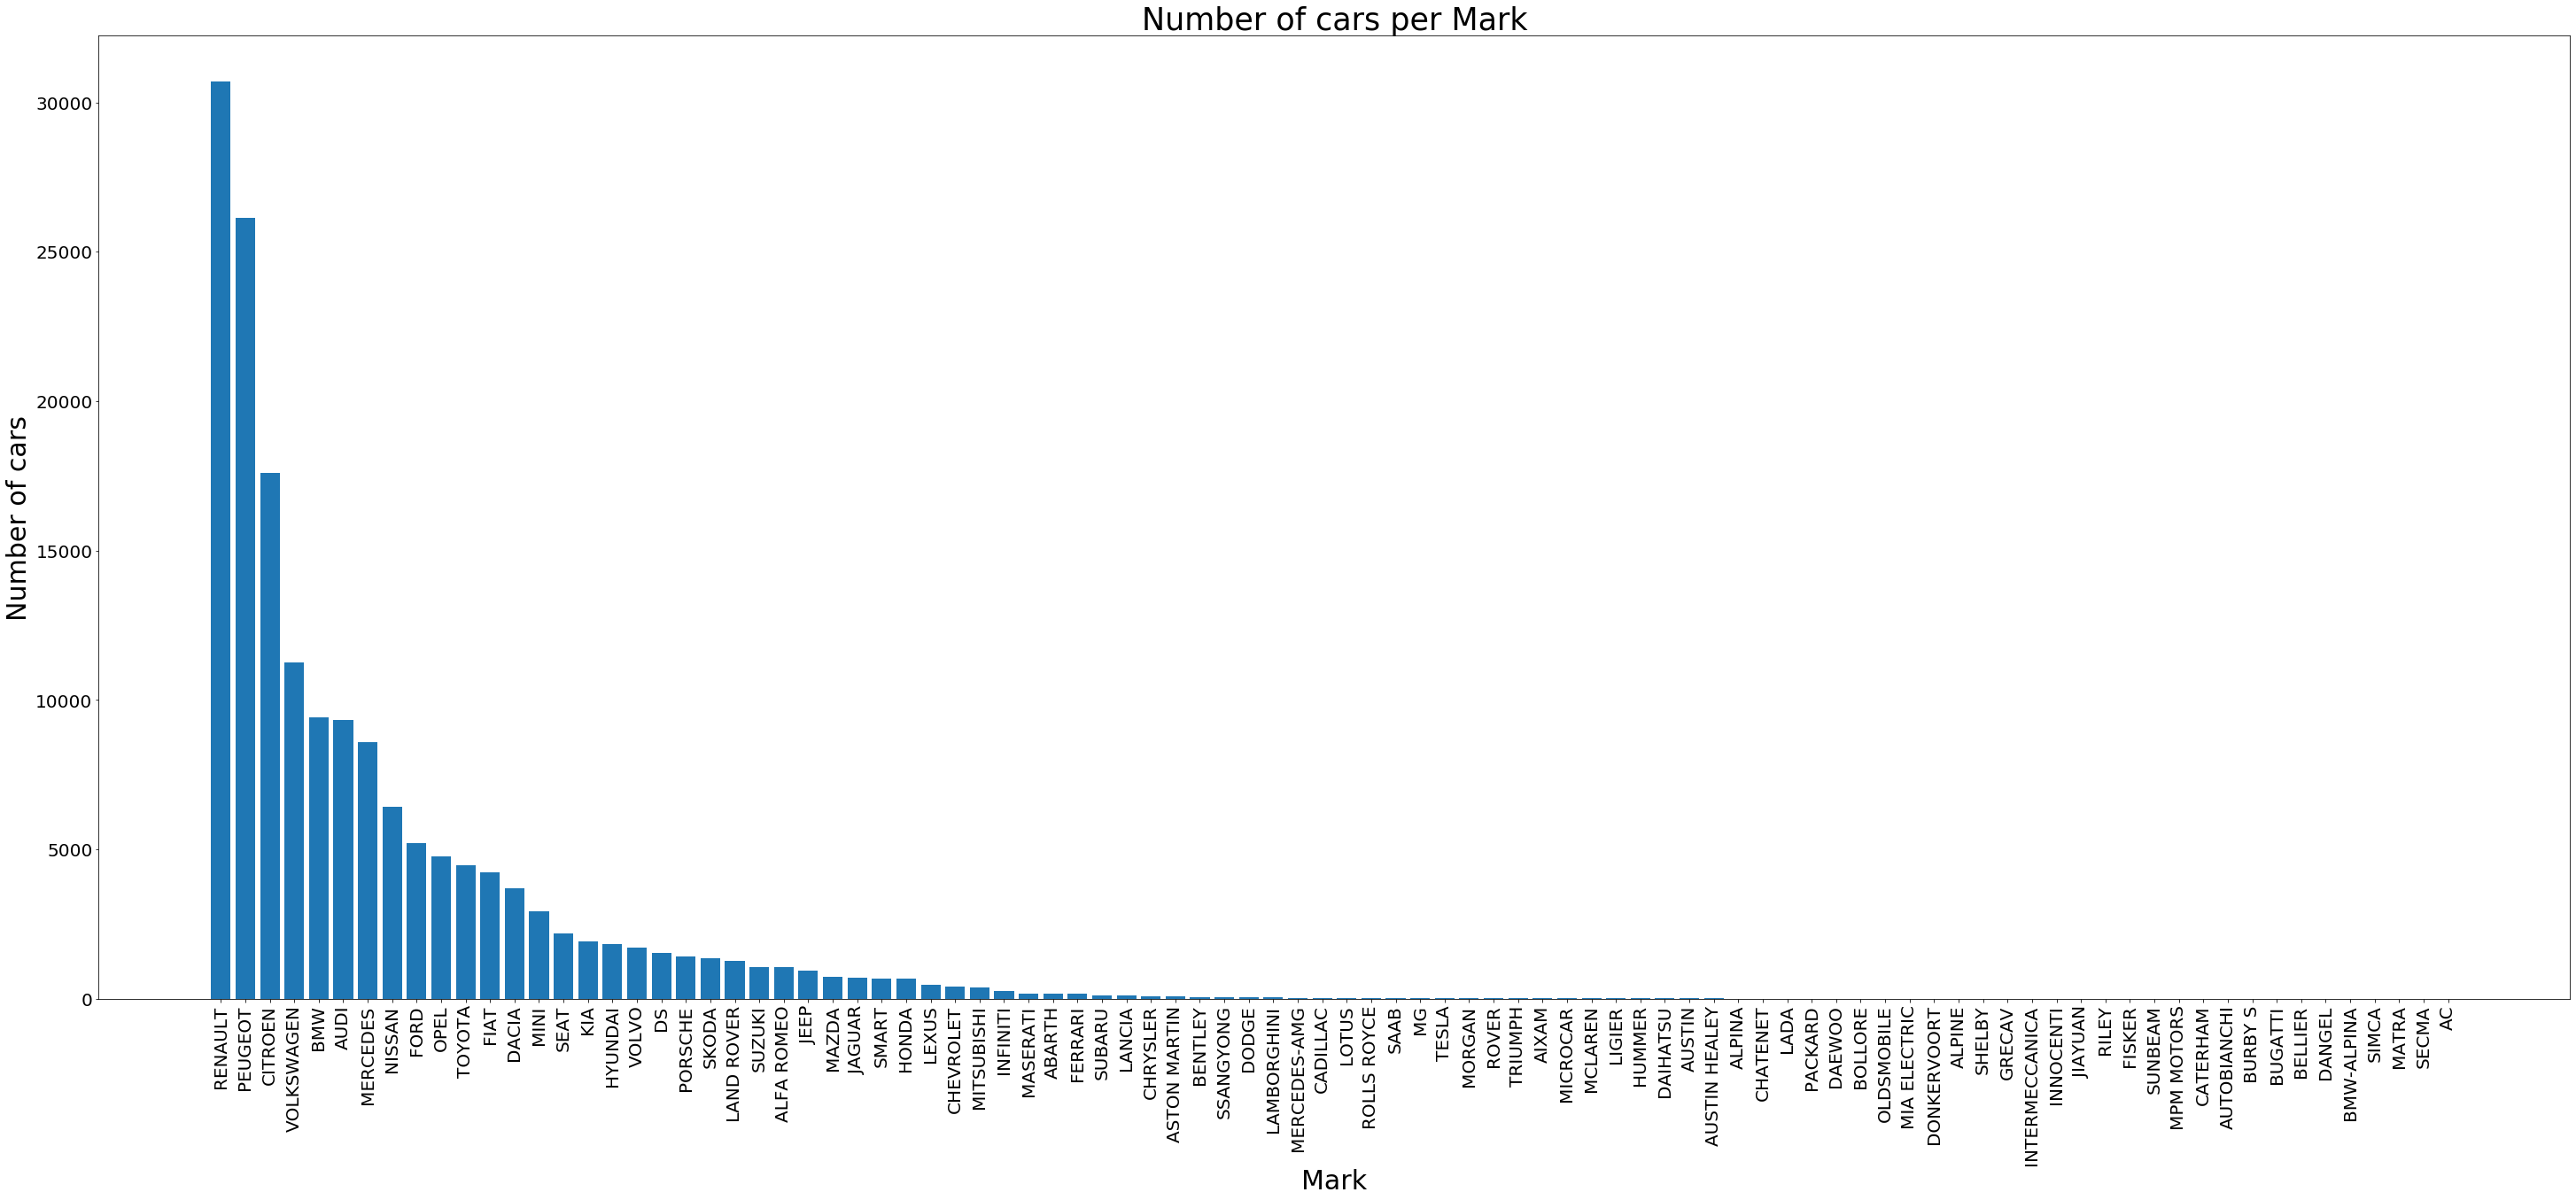

In [17]:
plt.figure(figsize=(50,20))
plt.bar("Maker", "nbrCar",data = df2)
plt.xlabel("Mark",size=30)
plt.xticks(rotation=90,size=20)
plt.ylabel("Number of cars",size=30)
plt.yticks(size=20)
plt.title('Number of cars per Mark',size=35)

Text(0, 0.5, '€')

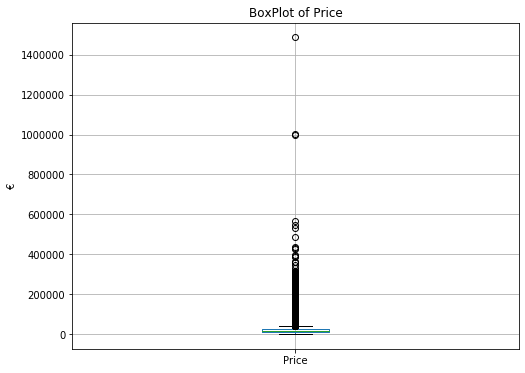

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
df.boxplot(column='Price', ax=ax)
# frame['ArrDelay'].plot.box(ax=ax) # Alternative
ax.set_title('BoxPlot of Price')
ax.set_ylabel('€')

In [19]:
pd.options.display.max_rows = 15
df.sort_values(by=['Model_year'])
df.loc[df['Model_year'] > 2020]

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
17541,13159.0,FIAT,500,5018,2973,Diesel,mécanique,02/05/2018 à 6h54,"modele: , version: LOUNGE 1.2 69, puissance_fi..."


In [20]:
df=df.loc[df['Model_year'] < 2020]

In [21]:
df=df.loc[df['Model_year'] > 1945]

In [22]:
df.at[56,'Description']

"modele: KADJAR, version: 1.6 DCI 130 ENERGY INTENS, puissance_fiscale: 7, portes: 5.0, options: écran tactile;volant cuir;régulateur limiteur de vitesse;système de récupération d'énergie au freinage;prises audio auxiliaires;cache bagages;direction assistée;blanc nacré;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;vitres ar. surteintées;appui-tête conducteur réglable hauteur;commandes vocales;mixte simili cuir/tissu noir titane;vitres teintées;bacs de portes arrière;GPS;services connectés;prise audio USB;poignées ton carrosserie;régulateur de vitesse;dispositif freinage automatique;carte main libre;jantes alu;boucliers av et ar couleur caisse;phares av. de jour;phares av. de jour à LED;airbags rideaux;projecteurs antibrouillard;blanc glacier;climatisation automatique multi zone;vitres électriques;feux de freinage d'urgence;caméra de recul;banquette rabattable;appui-tête passager réglable en hauteur;filtre à pollen;interface media;rétroviseurs rabattables électriquement;po

In [23]:
df['Fiscal_Horsepower'] = df['Description'].map(lambda x : int(re.search(r'puissance_fiscale: (.*?), ',x).group(1)))
df['Fiscal_Horsepower']

0          4
1         16
2         47
3          5
4          5
          ..
166690    10
166691     8
166692     5
166693     8
166694    10
Name: Fiscal_Horsepower, Length: 166682, dtype: int64

In [24]:
df['Fiscal_Horsepower'].unique()

array([   4,   16,   47,    5,   20,    7,    6,   40,    8,   11,   32,
         15,   12,   10,    9,   17,    0,   13,   14,   24,    3,   18,
         35,    1,   29,   34,  118,   52,   19,   22,   25,   28,   23,
         41,   26,   27,   21,   37,   61,   31,   50,   48,   46,   30,
         49,   42,    2,   38,   33,   43,   44,   54,   58,   63,   56,
         57,   45,   39,   51,   36,  131,   72,   59,   70,   64,   81,
        205, 2013,   62,   53,   68,   66,   73,   75,   69,  204,  202,
        110,   65,  150,  105,  109], dtype=int64)

In [25]:
df['doors'] = df['Description'].map(lambda x : re.search(r'portes:(.*?), ',x).group(1))
df['doors'] = df['doors'].map(lambda x: x.strip())
df['doors'] = df['doors'].map(lambda x: 7  if(x=='') else int(x[:-2]))
df['doors'].unique()

array([5, 3, 4, 2, 7, 0, 6], dtype=int64)

In [26]:
df['Options'] = df['Description'].map(lambda x : re.search(r'options:(.*?), couleur:', x).group(1).split(';'))
df['Options_Count'] = df['Description'].map(lambda x : re.search(r'options:(.*?), couleur:', x).group(1).count(';'))
df['Couleurs'] = df['Description'].map(lambda x : re.split(r'couleur: ', x)[-1])
df['Couleurs'].unique()

array(['BLANC BANQUISE', 'Carbonschwarz metallise',
       'NOIR PANTHERE CRISTAL', ...,
       'beige opaque (verni sans reflet)   ', 'NOIR OBSIDIEN NACRE',
       'Gris poivre metallis'], dtype=object)

In [27]:
df['Age']  = df['Online'].map(lambda x : datetime.strptime(x, '%d/%m/%Y à %Hh%M'))
df['Age'] = df.apply(lambda row: row['Age'].year - int(row['Model_year']), axis=1)

In [28]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,doors,Options,Options_Count,Couleurs,Age
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,5,"[ banquette arrière 3 places, volant cuir, cac...",53,BLANC BANQUISE,4
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,5,[ triangle de presignalisation et trousse de p...,40,Carbonschwarz metallise,3
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,5,"[ banquette arrière 3 places, écran tactile, t...",139,NOIR PANTHERE CRISTAL,4
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,3,"[ direction assistée, jantes alu, rétroviseurs...",7,JAUNE,11
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,5,"[ Volant alu & cuir, Bluetooth inclut musique ...",23,blanc verni,0


In [29]:
df['Fuel'].unique()

array(['Diesel', 'Essence', 'Hybride essence électrique', 'Electrique',
       'Bicarburation essence GNV', 'Hybride diesel électrique',
       'Bicarburation essence GPL', 'Bicarburation essence bioéthanol'],
      dtype=object)

In [30]:
df = df.join(pd.get_dummies(df['Fuel']))
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,...,Couleurs,Age,Bicarburation essence GNV,Bicarburation essence GPL,Bicarburation essence bioéthanol,Diesel,Electrique,Essence,Hybride diesel électrique,Hybride essence électrique
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,...,BLANC BANQUISE,4,0,0,0,1,0,0,0,0
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,...,Carbonschwarz metallise,3,0,0,0,1,0,0,0,0
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,...,NOIR PANTHERE CRISTAL,4,0,0,0,0,0,1,0,0
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,...,JAUNE,11,0,0,0,0,0,1,0,0
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,...,blanc verni,0,0,0,0,0,0,1,0,0


In [31]:
pd.set_option('display.max_columns', None)
df = df.join(pd.get_dummies(df['Gearbox']))
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,doors,Options,Options_Count,Couleurs,Age,Bicarburation essence GNV,Bicarburation essence GPL,Bicarburation essence bioéthanol,Diesel,Electrique,Essence,Hybride diesel électrique,Hybride essence électrique,automatique,mécanique
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,5,"[ banquette arrière 3 places, volant cuir, cac...",53,BLANC BANQUISE,4,0,0,0,1,0,0,0,0,0,1
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,5,[ triangle de presignalisation et trousse de p...,40,Carbonschwarz metallise,3,0,0,0,1,0,0,0,0,1,0
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,5,"[ banquette arrière 3 places, écran tactile, t...",139,NOIR PANTHERE CRISTAL,4,0,0,0,0,0,1,0,0,1,0
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,3,"[ direction assistée, jantes alu, rétroviseurs...",7,JAUNE,11,0,0,0,0,0,1,0,0,0,1
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,5,"[ Volant alu & cuir, Bluetooth inclut musique ...",23,blanc verni,0,0,0,0,0,0,1,0,0,0,1


In [32]:
pd.set_option('display.max_rows', None)
print (df.dtypes)
pd.set_option('display.max_rows', 15)

Price                               float64
Make                                 object
Model                                object
Model_year                            int64
Mileage                               int64
Fuel                                 object
Gearbox                              object
Online                               object
Description                          object
Fiscal_Horsepower                     int64
doors                                 int64
Options                              object
Options_Count                         int64
Couleurs                             object
Age                                   int64
Bicarburation essence GNV             uint8
Bicarburation essence GPL             uint8
Bicarburation essence bioéthanol      uint8
Diesel                                uint8
Electrique                            uint8
Essence                               uint8
Hybride diesel électrique             uint8
Hybride essence électrique      

In [33]:
def cylindre(string):
    cyl = re.search(r'(\d*\.\d*)', string)
    if(cyl != None):
        if cyl.group(1) != '.':
            val = round(float(cyl.group(1)), 1)
            return val
        else:
            return 0
    else:
        return 0
    
df['Cylindre'] = df['Description'].map(lambda x :  cylindre(re.search(r'version: (.*?),', x).group(1)))

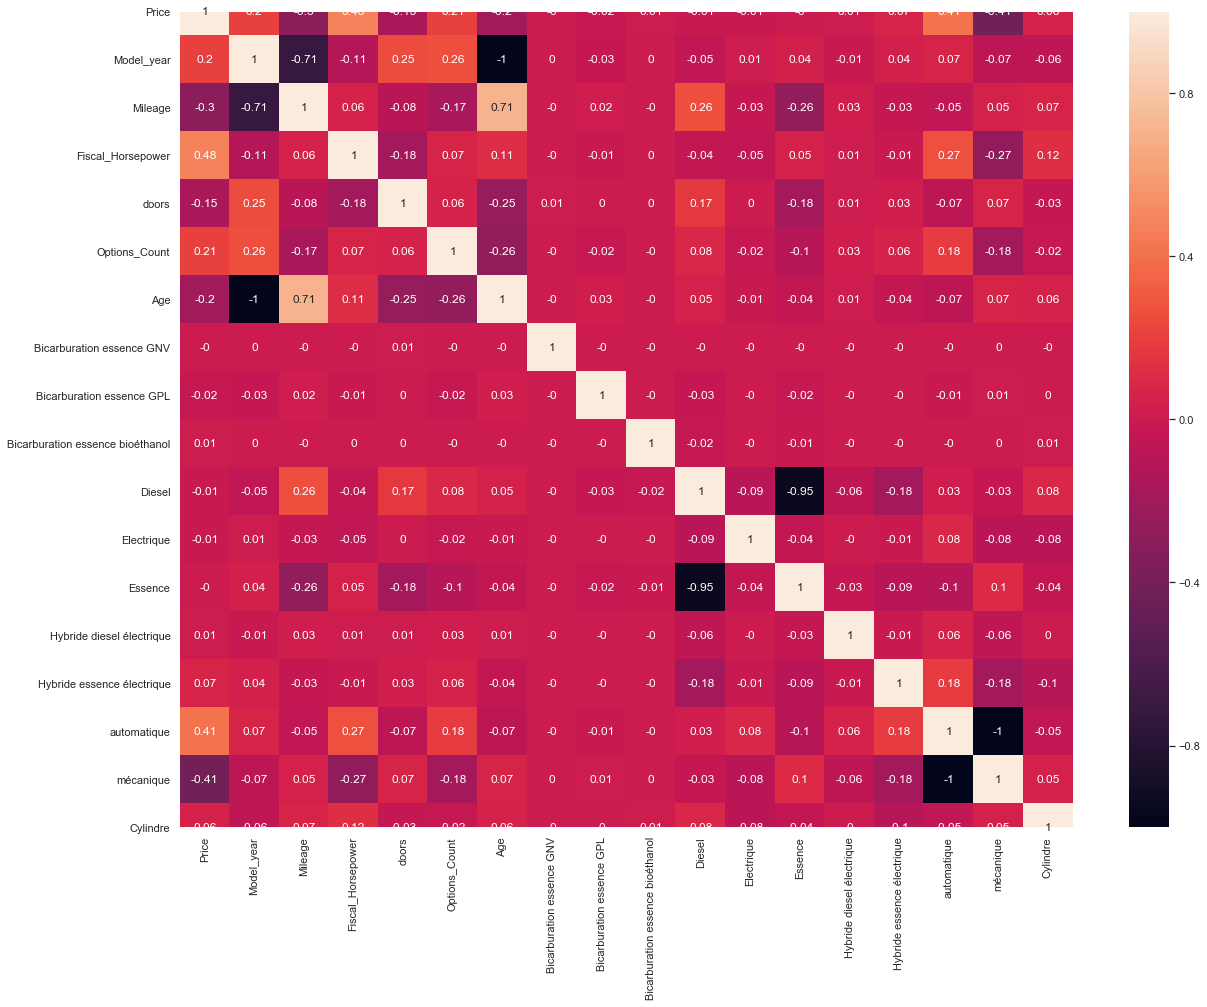

In [34]:
sns.set()
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr().round(2), annot=True)

In [35]:
df = df.join(pd.get_dummies(df['Cylindre']))

In [36]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,doors,Options,Options_Count,Couleurs,Age,Bicarburation essence GNV,Bicarburation essence GPL,Bicarburation essence bioéthanol,Diesel,Electrique,Essence,Hybride diesel électrique,Hybride essence électrique,automatique,mécanique,Cylindre,0.0,0.1,0.2,0.6,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0,5.2,5.3,5.5,5.7,5.9,6.0,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.7,8.0,8.6,12.2,13.8,16.4,16.6,19.3,35.5,39.0,42.9,47.3,52.7,58.8,69.5,71.0,73.8,74.4,76.5,87.5,159.2
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,5,"[ banquette arrière 3 places, volant cuir, cac...",53,BLANC BANQUISE,4,0,0,0,1,0,0,0,0,0,1,1.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,5,[ triangle de presignalisation et trousse de p...,40,Carbonschwarz metallise,3,0,0,0,1,0,0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,5,"[ banquette arrière 3 places, écran tactile, t...",139,NOIR PANTHERE CRISTAL,4,0,0,0,0,0,1,0,0,1,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,3,"[ direction assistée, jantes alu, rétroviseurs...",7,JAUNE,11,0,0,0,0,0,1,0,0,0,1,1.3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,5,"[ Volant alu & cuir, Bluetooth inclut musique ...",23,blanc verni,0,0,0,0,0,0,1,0,0,0,1,1.4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
df['Cylindre'].unique()

array([1.600e+00, 0.000e+00, 4.000e+00, 1.300e+00, 1.400e+00, 2.000e+00,
       1.500e+00, 1.800e+00, 1.100e+00, 1.200e+00, 1.000e+00, 4.200e+00,
       3.000e+00, 9.000e-01, 1.700e+00, 2.200e+00, 1.900e+00, 3.400e+00,
       4.500e+00, 3.500e+00, 6.200e+00, 2.700e+00, 8.000e-01, 1.640e+01,
       4.400e+00, 2.500e+00, 2.400e+00, 3.200e+00, 3.600e+00, 3.800e+00,
       3.700e+00, 4.100e+00, 5.300e+00, 5.000e+00, 2.900e+00, 6.800e+00,
       4.700e+00, 4.800e+00, 2.300e+00, 2.800e+00, 5.700e+00, 5.200e+00,
       6.600e+00, 3.900e+00, 6.000e+00, 2.100e+00, 4.300e+00, 5.500e+00,
       5.900e+00, 3.550e+01, 6.500e+00, 8.000e+00, 5.270e+01, 6.300e+00,
       7.650e+01, 4.600e+00, 6.400e+00, 7.380e+01, 6.700e+00, 7.440e+01,
       3.300e+00, 8.750e+01, 1.000e-01, 3.900e+01, 1.930e+01, 1.220e+01,
       4.730e+01, 6.900e+00, 1.380e+01, 1.660e+01, 2.600e+00, 7.700e+00,
       6.000e-01, 2.000e-01, 1.592e+02, 3.100e+00, 8.600e+00, 7.100e+01,
       4.290e+01, 6.950e+01, 5.880e+01])

Text(0.5, 0, 'Cylindrée')

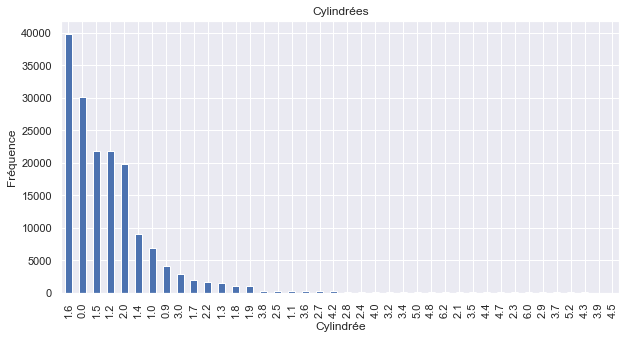

In [38]:
df['Cylindre'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Cylindrées')
plt.ylabel('Fréquence')
plt.xlabel('Cylindrée')

In [39]:
df = df.join(pd.get_dummies(df['Make']))
list(df)

['Price',
 'Make',
 'Model',
 'Model_year',
 'Mileage',
 'Fuel',
 'Gearbox',
 'Online',
 'Description',
 'Fiscal_Horsepower',
 'doors',
 'Options',
 'Options_Count',
 'Couleurs',
 'Age',
 'Bicarburation essence GNV',
 'Bicarburation essence GPL',
 'Bicarburation essence bioéthanol',
 'Diesel',
 'Electrique',
 'Essence',
 'Hybride diesel électrique',
 'Hybride essence électrique',
 'automatique',
 'mécanique',
 'Cylindre',
 0.0,
 0.1,
 0.2,
 0.6,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 5.0,
 5.2,
 5.3,
 5.5,
 5.7,
 5.9,
 6.0,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.7,
 8.0,
 8.6,
 12.2,
 13.8,
 16.4,
 16.6,
 19.3,
 35.5,
 39.0,
 42.9,
 47.3,
 52.7,
 58.8,
 69.5,
 71.0,
 73.8,
 74.4,
 76.5,
 87.5,
 159.2,
 'ABARTH',
 'AC',
 'AIXAM',
 'ALFA ROMEO',
 'ALPINA',
 'ALPINE',
 'AS

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [41]:
pd.set_option('display.max_rows', None)
print (df.dtypes)
pd.set_option('display.max_rows', 15)

Price                               float64
Make                                 object
Model                                object
Model_year                            int64
Mileage                               int64
Fuel                                 object
Gearbox                              object
Online                               object
Description                          object
Fiscal_Horsepower                     int64
doors                                 int64
Options                              object
Options_Count                         int64
Couleurs                             object
Age                                   int64
Bicarburation essence GNV             uint8
Bicarburation essence GPL             uint8
Bicarburation essence bioéthanol      uint8
Diesel                                uint8
Electrique                            uint8
Essence                               uint8
Hybride diesel électrique             uint8
Hybride essence électrique      

In [42]:
pd.set_option('display.max_columns', None)
df.columns

Index([            'Price',              'Make',             'Model',
              'Model_year',           'Mileage',              'Fuel',
                 'Gearbox',            'Online',       'Description',
       'Fiscal_Horsepower',
       ...
                   'SMART',         'SSANGYONG',            'SUBARU',
                 'SUNBEAM',            'SUZUKI',             'TESLA',
                  'TOYOTA',           'TRIUMPH',        'VOLKSWAGEN',
                   'VOLVO'],
      dtype='object', length=199)

In [43]:
input_columns=['Model_year','Age','Mileage','Fiscal_Horsepower','Cylindre', 'Options_Count','doors', 'Bicarburation essence GNV','Bicarburation essence GPL','Bicarburation essence bioéthanol','Diesel', 'Electrique','Hybride diesel électrique','Hybride essence électrique','automatique','mécanique']

In [44]:
X = df[input_columns]
#independent variables
y = df['Price'] #dependent (target) variable

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2 )

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133345, 16), (33337, 16), (133345,), (33337,))

In [47]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
linreg.score(X_train, y_train)


0.4136054977686736

In [49]:
linreg.score(X_test, y_test)

0.5209230995576295

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#regr = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=10)

#print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))

#print('R-squared score (training): {:.3f}'
     .format(regr.score(X_test, y_test)))

In [53]:
regr = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=10)

regr.fit(X_train, y_train)
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))

print('R-squared score (training): {:.3f}'
     .format(regr.score(X_test, y_test)))

R-squared score (training): 0.954
R-squared score (training): 0.882


In [54]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
score = mean_absolute_percentage_error(0.954,0.874)
print("The percentage : {} %".format(score))

The percentage : 8.385744234800836 %


# NLP Processing